<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [24]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-25 08:39:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.8MB/s    in 3.4s    

2025-01-25 08:39:10 (59.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [25]:
!pip install matplotlib
!pip install pandas

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Connect to the SQLite database


In [27]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [28]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


**Demo 2: List all tables**


In [29]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


**Demo 3: Group data by age**


In [30]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [31]:
# Query the data for 'CompTotal'
query = "SELECT CompTotal FROM main"
df = pd.read_sql(query, conn)

In [32]:
# Remove NA
df_cleaned = df['CompTotal'].dropna()

# Calculate IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers using 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned >= lower_bound) & (df_cleaned <= upper_bound)]

In [33]:
print("Summary Statistics (after cleaning and filtering outliers):")
print(df_cleaned.describe())

print("\nUnique Values and Counts (after cleaning and filtering outliers):")
print(df_cleaned.value_counts())

Summary Statistics (after cleaning and filtering outliers):
count     27864.000000
mean     117182.605369
std       99970.300622
min           0.000000
25%       50000.000000
50%       88000.000000
75%      150000.000000
max      535000.000000
Name: CompTotal, dtype: float64

Unique Values and Counts (after cleaning and filtering outliers):
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
160.0         1
216500.0      1
175.0         1
78394.0       1
449000.0      1
Name: count, Length: 2203, dtype: int64


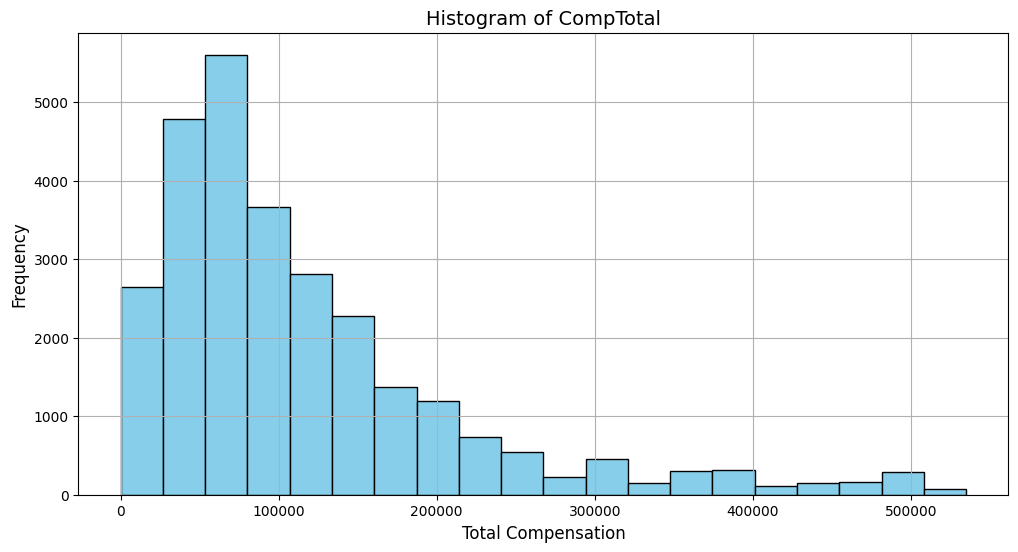

In [34]:
## Write your code here

plt.figure(figsize=(12, 6))
plt.hist(df_cleaned, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CompTotal', fontsize=14)
plt.xlabel('Total Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [35]:
# Query the data for 'YearsCodePro'
query = "SELECT YearsCodePro FROM main"
df = pd.read_sql(query, conn)

# Replace non-numeric values
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,     # Represent less than 1 year as 0
    'More than 50 years': 51   # Represent more than 50 years as 51
})

# Convert 'YearsCodePro' column to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop NA values
df_cleaned = df['YearsCodePro'].dropna()

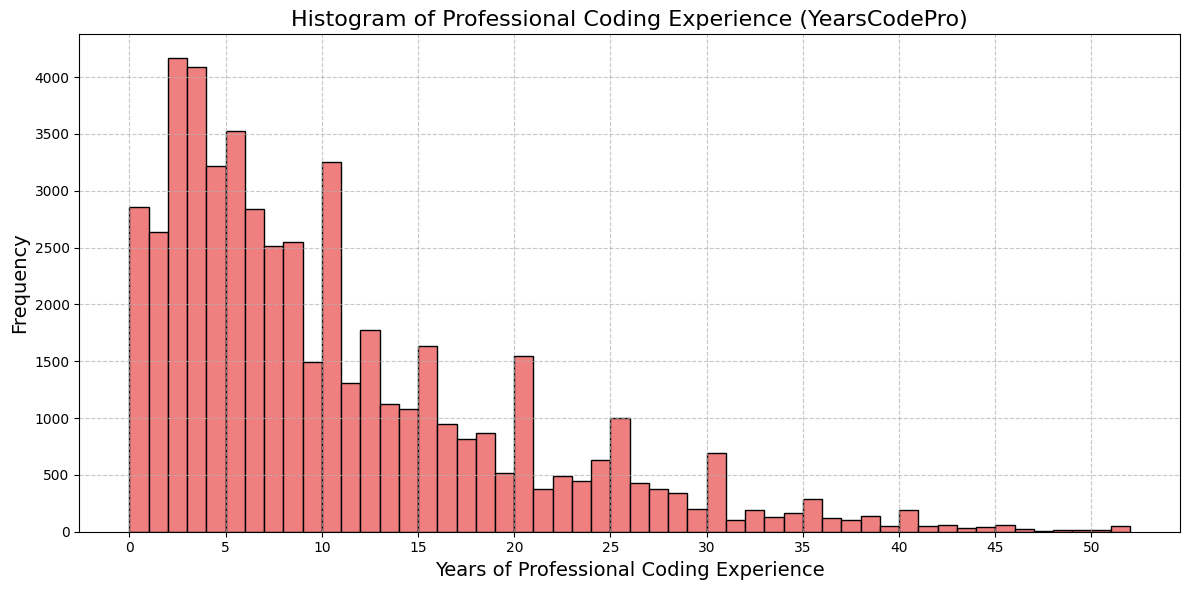

In [36]:
## Write your code here

# Plot the histogram of YearsCodePro with equal width bins
plt.figure(figsize=(12, 6))

# Create equal width bins: from 0 to max value, with a bin width of 1
max_value = df_cleaned.max()
bins = range(0, int(max_value) + 2)

# Plot the histogram
plt.hist(df_cleaned, bins=bins, color='lightcoral', edgecolor='black')

# Titles and labels
plt.title('Histogram of Professional Coding Experience (YearsCodePro)', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set custom x-axis labels for clarity
if max_value <= 20:  # Limit ticks for smaller ranges
    plt.xticks(range(0, int(max_value) + 2, 1))  # Show ticks from 0 to max value
else:
    plt.xticks(range(0, int(max_value) + 2, 5))  # Show ticks every 5 years

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [37]:
# Query the data for 'Age' and 'CompTotal'
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql(query, conn)

#Print unique values and counts for 'Age' column
print("Unique values and counts for Age column:")
print(df['Age'].value_counts())

#Print unique values and counts for 'CompTotal' column (if needed)
print("\nUnique values and counts for CompTotal column:")
print(df['CompTotal'].value_counts())

# Clean the data by removing rows with missing 'CompTotal'
df = df.dropna(subset=['CompTotal'])

Unique values and counts for Age column:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

Unique values and counts for CompTotal column:
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64


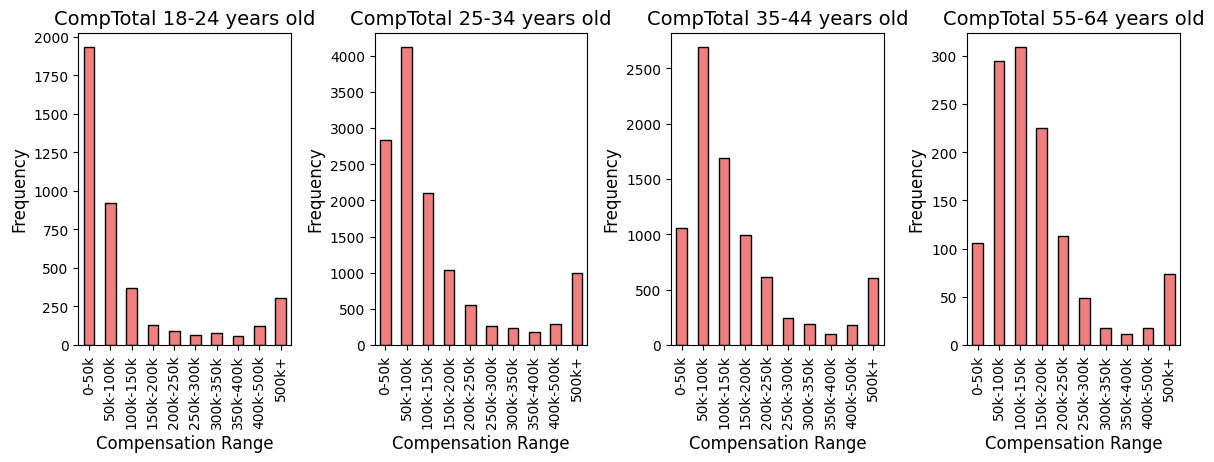

In [38]:
# Ensure the 'Age' column contains only valid age group categories
age_groups = ['18-24 years old', '25-34 years old', 
              '35-44 years old', '55-64 years old']

df['AgeGroup'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)

# Bin the 'CompTotal' values into ranges
comp_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000, 1000000]
comp_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', 
               '300k-350k', '350k-400k', '400k-500k', '500k+']

df['CompTotalBin'] = pd.cut(df['CompTotal'], bins=comp_bins, labels=comp_labels, right=False)

# Plot histograms of 'CompTotal' for each Age group
plt.figure(figsize=(12, 8))

# Loop through each age group and plot the histogram for 'CompTotal'
for i, age_group in enumerate(age_groups):
    plt.subplot(2, 4, i+1)
    group_data = df[df['AgeGroup'] == age_group]['CompTotalBin']
    
    # Plot the histogram for 'CompTotal'
    group_data.value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f'CompTotal {age_group}', fontsize=14)
    plt.xlabel('Compensation Range', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [45]:
# Query the data for 'Age' and 'TimeSearching'
query = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql(query, conn)

# Print unique values and counts for 'Age'
print("Unique values and counts for Age column:")
print(df['Age'].value_counts())

# Print unique values and counts for 'TimeSearching'
print("\nUnique values and counts for TimeSearching column:")
print(df['TimeSearching'].value_counts())

Unique values and counts for Age column:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

Unique values and counts for TimeSearching column:
TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64


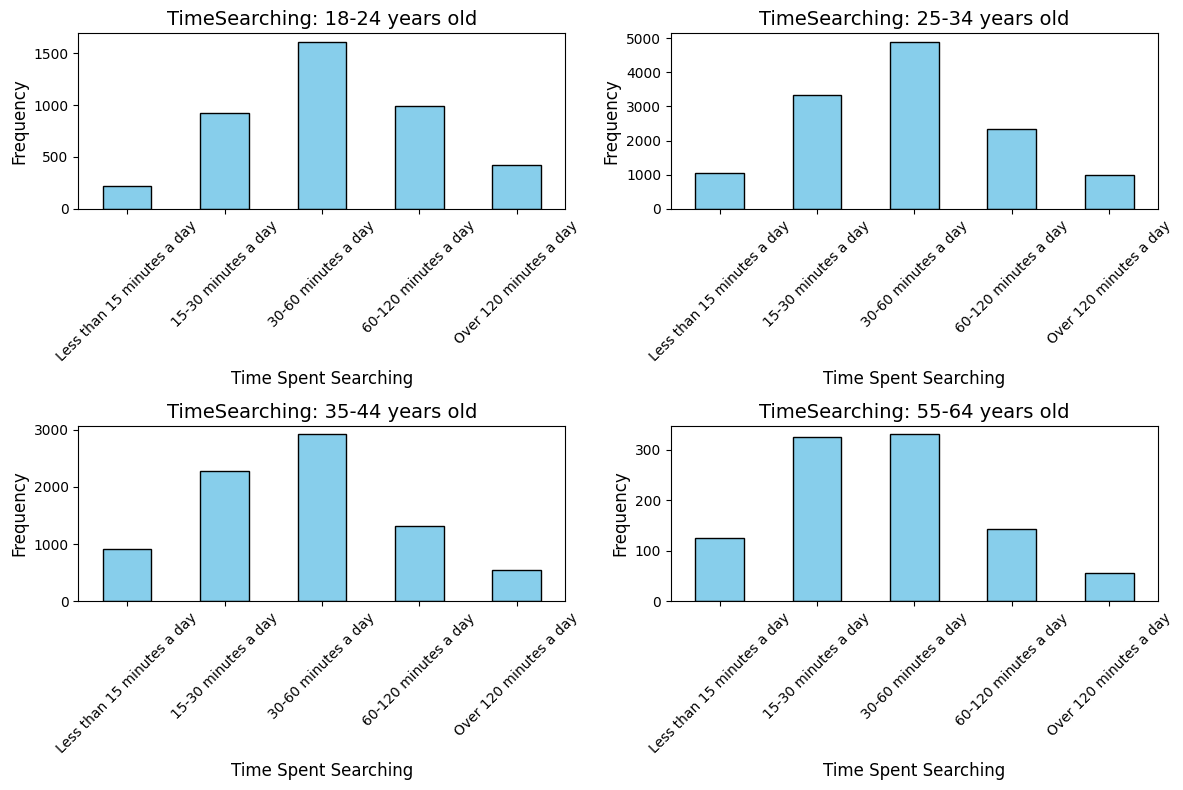

In [46]:
## Write your code here

# Filter for specific age groups
age_groups = ['18-24 years old', '25-34 years old', 
              '35-44 years old', '55-64 years old']
df['AgeGroup'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)

# Mapping 'TimeSearching' categories to ensure consistent order
time_order = ['Less than 15 minutes a day', '15-30 minutes a day', 
              '30-60 minutes a day', '60-120 minutes a day', 'Over 120 minutes a day']
df['TimeSearching'] = pd.Categorical(df['TimeSearching'], categories=time_order, ordered=True)

# Plot histograms for each age group
plt.figure(figsize=(12, 8))

for i, age_group in enumerate(age_groups):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns for subplots
    group_data = df[df['AgeGroup'] == age_group]['TimeSearching']
    
    # Plot a bar chart for the distribution of 'TimeSearching'
    group_data.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'TimeSearching: {age_group}', fontsize=14)
    plt.xlabel('Time Spent Searching', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [57]:
# Query the data for 'DatabaseWantToWorkWith'
query = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql(query, conn)

value_counts = df['DatabaseWantToWorkWith'].value_counts()
print(value_counts)

# Get the top 5 databases
top_5_databases = value_counts.nlargest(5).index
print("\nTop 5 Databases:")
print(top_5_databases)

DatabaseWantToWorkWith
PostgreSQL                                                                 3738
PostgreSQL;SQLite                                                          1533
SQLite                                                                     1476
Microsoft SQL Server                                                       1431
MySQL                                                                      1139
                                                                           ... 
Clickhouse;MariaDB;MySQL;PostgreSQL;Redis                                     1
MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite;TiDB               1
DuckDB;Elasticsearch;MongoDB;PostgreSQL                                       1
H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite                        1
BigQuery;Cassandra;Firebase Realtime Database;PostgreSQL;Redis;Supabase       1
Name: count, Length: 8478, dtype: int64

Top 5 Databases:
Index(['PostgreSQL', 'PostgreSQL;SQLite

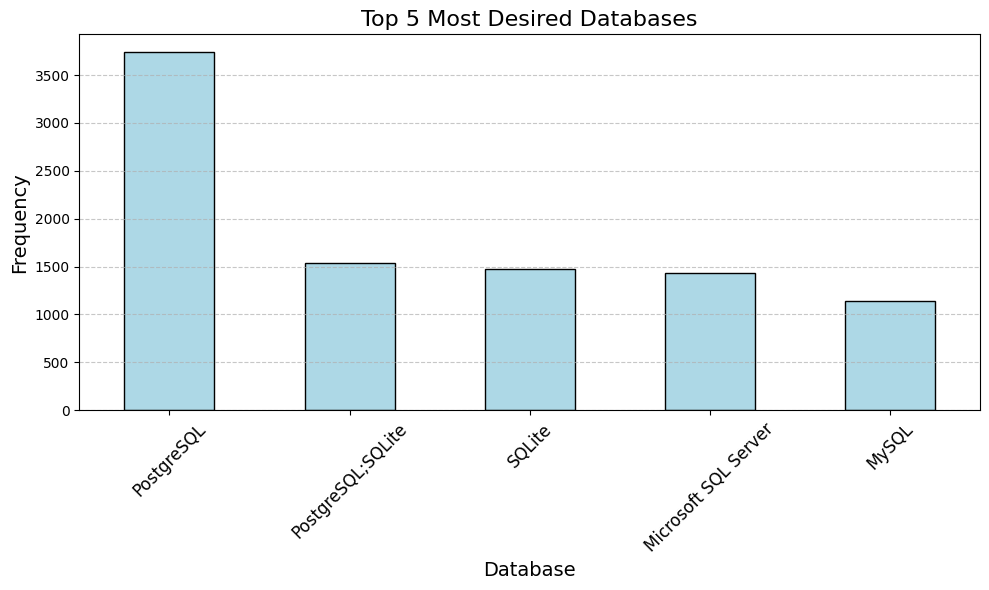

In [58]:
## Write your code here

# Plot the histogram for the top 5 databases
plt.figure(figsize=(10, 6))
filtered_df['DatabaseWantToWorkWith'].value_counts().plot(
    kind='bar', color='lightblue', edgecolor='black'
)

# Customize the plot
plt.title('Top 5 Most Desired Databases', fontsize=16)
plt.xlabel('Database', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [62]:
# Query the data for 'RemoteWork' column
query = "SELECT RemoteWork FROM main"
df = pd.read_sql(query, conn)

# Print unique values and their counts
print("Unique values and counts for RemoteWork column:")
value_counts = df['RemoteWork'].value_counts()
print(value_counts)

Unique values and counts for RemoteWork column:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


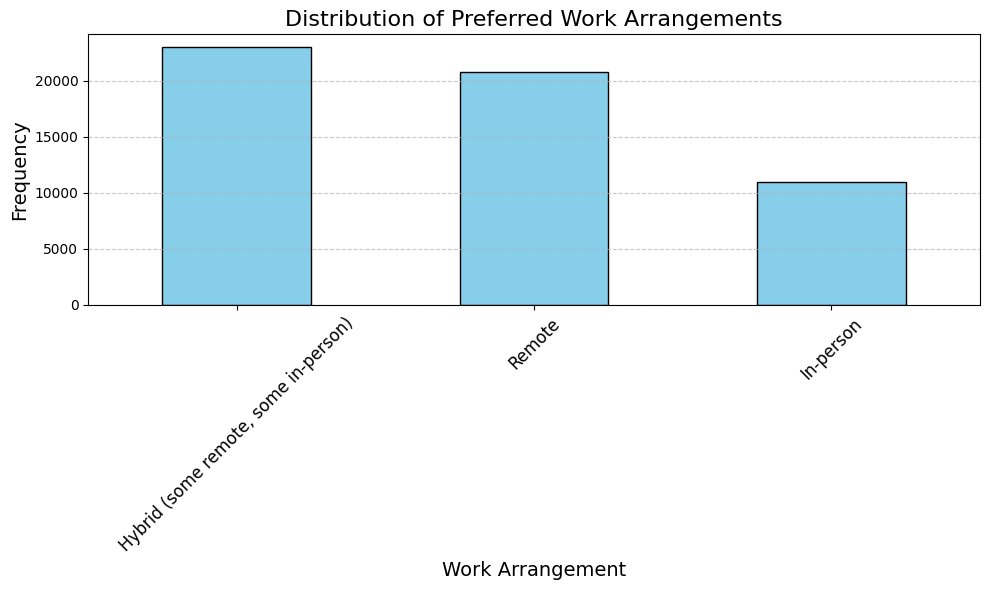

In [63]:
## Write your code here

# Plot the histogram for 'WorkArrangement'
plt.figure(figsize=(10, 6))
value_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Preferred Work Arrangements', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [66]:
# Query for 'Age' and 'CompTotal' for the age group 45 to 64
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
"""
df = pd.read_sql(query, conn)

# Print summary statistics for 'CompTotal'
print("\nSummary statistics for CompTotal:")
print(df['CompTotal'].describe())


Summary statistics for CompTotal:
count    4.795000e+03
mean     2.085506e+49
std      1.444128e+51
min      0.000000e+00
25%      8.000000e+04
50%      1.310000e+05
75%      2.150000e+05
max      1.000000e+53
Name: CompTotal, dtype: float64


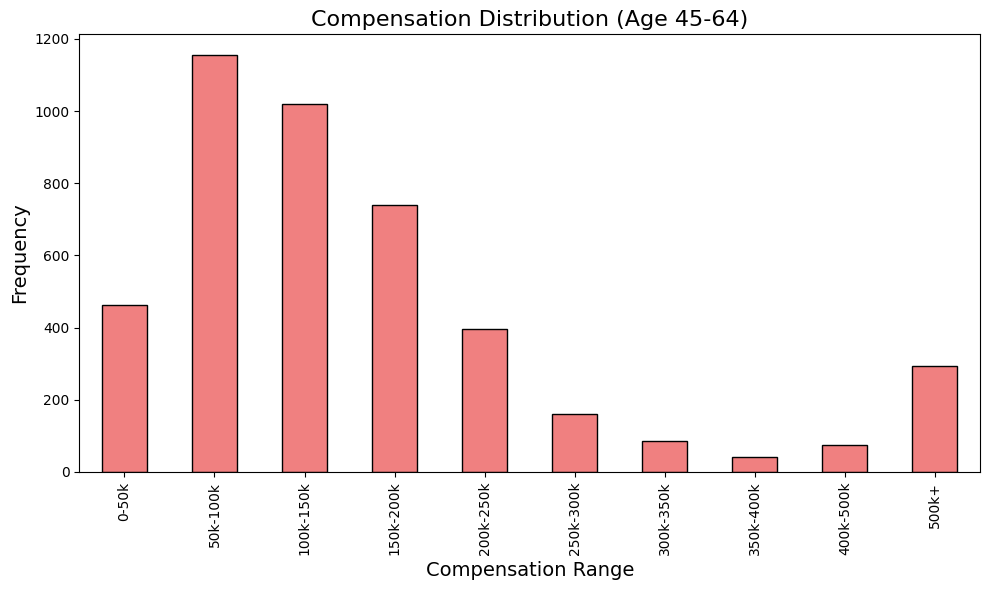

In [69]:
## Write your code here

# Define bins and labels for compensation
comp_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000, 1000000]
comp_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', 
               '300k-350k', '350k-400k', '400k-500k', '500k+']

# Bin the 'CompTotal' values into ranges
df['CompTotalBin'] = pd.cut(df['CompTotal'], bins=comp_bins, labels=comp_labels, right=False)

# Plot the histogram for the binned 'CompTotal'
plt.figure(figsize=(10, 6))
df['CompTotalBin'].value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')

# Add titles and labels
plt.title('Compensation Distribution (Age 45-64)', fontsize=16)
plt.xlabel('Compensation Range', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [79]:
# Query the data for 'JobSat' and 'YearsCodePro'
query = "SELECT JobSat, YearsCodePro FROM main"
df = pd.read_sql(query, conn)

# Print unique values and counts for 'JobSat' column
print("Unique values and counts for JobSat column:")
print(df['JobSat'].value_counts())

# Print unique values and counts for 'YearsCodePro' column
print("\nUnique values and counts for YearsCodePro column:")
print(df['YearsCodePro'].value_counts())

Unique values and counts for JobSat column:
JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

Unique values and counts for YearsCodePro column:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26            

In [86]:
# Replace 'Less than 1 year' with 0 and 'More than 50 years' with 51
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

# Convert YearsCodePro to numeric (if it's not already)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define the years bins and labels
years_bins = [0, 10, 20, 30, 40, 50, 60]
years_labels = ['<10', '10-20', '20-30', '30-40', '40-50', '60+']

# Bin the 'YearsCodePro' values into defined ranges
df['YearsCodeProBin'] = pd.cut(df['YearsCodePro'], bins=years_bins, labels=years_labels, right=False)

print(df['YearsCodeProBin'].value_counts())

YearsCodeProBin
<10      29899
10-20    13327
20-30     5843
30-40     1986
40-50      491
60+         64
Name: count, dtype: int64


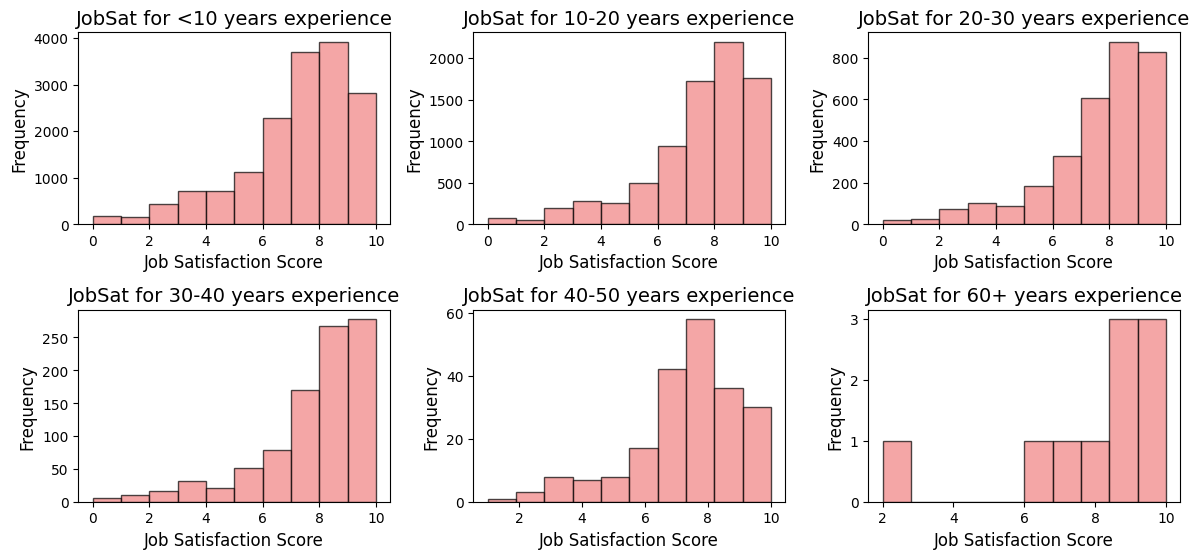

In [87]:
## Write your code here

# Plot histograms for JobSat across different years of coding experience
plt.figure(figsize=(12, 8))

# Loop through each years group and plot the histogram for JobSat
for i, years_group in enumerate(years_labels):
    plt.subplot(3, 3, i+1)  # 3 rows, 3 columns of subplots
    group_data = df[df['YearsCodeProBin'] == years_group]['JobSat']
    
    # Plot the histogram for JobSat within each years group
    plt.hist(group_data, bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
    plt.title(f'JobSat for {years_group} years experience', fontsize=14)
    plt.xlabel('Job Satisfaction Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [22]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
